!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

!pip install transformers 

In [98]:
#Import librairies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import io
import re
import string
import torch
import requests
import tqdm
import keras
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
# from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from pathlib import Path
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from bs4 import BeautifulSoup
%load_ext autoreload
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score,precision_score,recall_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#Open drive
from google.colab import drive 
drive.mount('/content/gdrive')

#List the drive's content to fix the path
! ls /content/gdrive/MyDrive/Stage

In [2]:
#Import data from the drive
df = pd.read_csv('Audible_English_Books.csv')
df.head()

,Unnamed: 0,Title,Author,Image_URL,Book_URL,Type,Description,Reviews,Rating
0,0,Storyworthy,Matthew Dicks,https://m.media-amazon.com/images/I/51foPoGk58...,https://www.audible.in/pd/Storyworthy-Audioboo...,['Business & Careers'],A five-time Moth GrandSLAM winner and bestsell...,[' not many tips on how to deliver a good stor...,"['2', '5', '1', '5', '1', '1', '4', '5', '4', ..."
1,1,The New Comedy Bible,Judy Carter,https://m.media-amazon.com/images/I/51UIsSCRlQ...,https://www.audible.in/pd/The-New-Comedy-Bible...,['Arts & Entertainment'],"The New Comedy Bible is a step-by-step, no exc...","[' PDF workbook ', ' Fantastic Book ', ' Horri...","['5', '5', '1', '5', '3', '5', '5', '5', '4', ..."
2,2,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...","[' Better live ', ' couldn t get through it ',...","['1', '2', '3', '4', '1', '1', '2', '2', '1', ..."
3,3,Someday Is Today,Matthew Dicks,https://m.media-amazon.com/images/I/41l1gHqfvp...,https://www.audible.in/pd/Someday-Is-Today-Aud...,['Arts & Entertainment'],REALIZE YOUR CREATIVE DREAMS—STARTING TODAY Ar...,"[' Super motivating ', ' Inspiring ']","['5', '5']"
4,4,Good Omens,Terry Pratchett,https://m.media-amazon.com/images/I/51Cyok-6Tu...,https://www.audible.in/pd/Good-Omens-Audiobook...,['Arts & Entertainment'],Neil Gaiman was the WINNER of the BBC Audio Dr...,[' An adaption of one of my all time favorite ...,"['4', '2', '5', '5', '5', '3', '5', '5', '4', ..."


In [3]:
#Delete unnecessary column
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Title,Author,Image_URL,Book_URL,Type,Description,Reviews,Rating
0,Storyworthy,Matthew Dicks,https://m.media-amazon.com/images/I/51foPoGk58...,https://www.audible.in/pd/Storyworthy-Audioboo...,['Business & Careers'],A five-time Moth GrandSLAM winner and bestsell...,[' not many tips on how to deliver a good stor...,"['2', '5', '1', '5', '1', '1', '4', '5', '4', ..."
1,The New Comedy Bible,Judy Carter,https://m.media-amazon.com/images/I/51UIsSCRlQ...,https://www.audible.in/pd/The-New-Comedy-Bible...,['Arts & Entertainment'],"The New Comedy Bible is a step-by-step, no exc...","[' PDF workbook ', ' Fantastic Book ', ' Horri...","['5', '5', '1', '5', '3', '5', '5', '5', '4', ..."
2,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...","[' Better live ', ' couldn t get through it ',...","['1', '2', '3', '4', '1', '1', '2', '2', '1', ..."
3,Someday Is Today,Matthew Dicks,https://m.media-amazon.com/images/I/41l1gHqfvp...,https://www.audible.in/pd/Someday-Is-Today-Aud...,['Arts & Entertainment'],REALIZE YOUR CREATIVE DREAMS—STARTING TODAY Ar...,"[' Super motivating ', ' Inspiring ']","['5', '5']"
4,Good Omens,Terry Pratchett,https://m.media-amazon.com/images/I/51Cyok-6Tu...,https://www.audible.in/pd/Good-Omens-Audiobook...,['Arts & Entertainment'],Neil Gaiman was the WINNER of the BBC Audio Dr...,[' An adaption of one of my all time favorite ...,"['4', '2', '5', '5', '5', '3', '5', '5', '4', ..."


In [4]:
dfnew=df.loc[:,['Title','Reviews','Rating']]
dfnew.head()

,Title,Reviews,Rating
0,Storyworthy,[' not many tips on how to deliver a good stor...,"['2', '5', '1', '5', '1', '1', '4', '5', '4', ..."
1,The New Comedy Bible,"[' PDF workbook ', ' Fantastic Book ', ' Horri...","['5', '5', '1', '5', '3', '5', '5', '5', '4', ..."
2,Seriously...I'm Kidding,"[' Better live ', ' couldn t get through it ',...","['1', '2', '3', '4', '1', '1', '2', '2', '1', ..."
3,Someday Is Today,"[' Super motivating ', ' Inspiring ']","['5', '5']"
4,Good Omens,[' An adaption of one of my all time favorite ...,"['4', '2', '5', '5', '5', '3', '5', '5', '4', ..."


In [5]:
dfnew['Rating']=dfnew['Rating'].str.split(',')
dfnew['Reviews']=dfnew['Reviews'].str.split(',')

In [6]:
df2 = dfnew.set_index(['Title']).apply(pd.Series.explode).reset_index()
df2

,Title,Reviews,Rating
0,Storyworthy,[' not many tips on how to deliver a good story ',['2'
1,Storyworthy,' This book leapt into my top 5 ','5'
2,Storyworthy,' There are better books On Story then this ','1'
3,Storyworthy,' Thought provoking ','5'
4,Storyworthy,' his voice gave me a massive headache ','1'
...,...,...,...
18573,David Attenborough: The Early Years Collection,' Genius Richard Attenborough is beyond belie...,'5'
18574,David Attenborough: The Early Years Collection,' Too good There is only one thing which disa...,'5'
18575,David Attenborough: The Early Years Collection,' Had me intrigued and laughing the whole way...,'5'
18576,David Attenborough: The Early Years Collection,' Spellbinding Loved this book So interesting...,'5'


In [7]:
df2['Rating'] = df2['Rating'].apply(lambda x: re.sub('\D+',' ', x))
df2.head()

,Title,Reviews,Rating
0,Storyworthy,[' not many tips on how to deliver a good story ',2
1,Storyworthy,' This book leapt into my top 5 ',5
2,Storyworthy,' There are better books On Story then this ',1
3,Storyworthy,' Thought provoking ',5
4,Storyworthy,' his voice gave me a massive headache ',1


In [8]:
df2['Reviews'].iloc[0]

"[' not many tips on how to deliver a good story '"

In [9]:
#Remove punctuations and special characters
df2['Reviews'] = df2['Reviews'].apply(lambda x: re.sub('\W+',' ', x))
df2.head()

,Title,Reviews,Rating
0,Storyworthy,not many tips on how to deliver a good story,2
1,Storyworthy,This book leapt into my top 5,5
2,Storyworthy,There are better books On Story then this,1
3,Storyworthy,Thought provoking,5
4,Storyworthy,his voice gave me a massive headache,1


In [10]:
#Data transformation into lowercase letters
df2['Reviews_preprocessing'] = df2['Reviews'].astype(str).str.lower()
df2.head()

,Title,Reviews,Rating,Reviews_preprocessing
0,Storyworthy,not many tips on how to deliver a good story,2,not many tips on how to deliver a good story
1,Storyworthy,This book leapt into my top 5,5,this book leapt into my top 5
2,Storyworthy,There are better books On Story then this,1,there are better books on story then this
3,Storyworthy,Thought provoking,5,thought provoking
4,Storyworthy,his voice gave me a massive headache,1,his voice gave me a massive headache


In [11]:
df2['Reviews_preprocessing'].iloc[0]

' not many tips on how to deliver a good story '

In [12]:
#Perform tokenization in combination with regular expressions
regexp = RegexpTokenizer('\w+')
df2['Reviews_preprocessing']=df2['Reviews_preprocessing'].apply(regexp.tokenize)
#Word Tokenization
# df['Reviews']=df['Reviews'].apply(word_tokenize)
# df['Reviews']= [word_tokenize(str(i)) for i in df['Reviews']]

In [13]:
df2['Reviews_preprocessing'].iloc[0]

['not', 'many', 'tips', 'on', 'how', 'to', 'deliver', 'a', 'good', 'story']

In [14]:
#Removing punctuations from Reviews
# All_punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
# for elements in df2['Reviews']:
#   if All_punct in elements:
#     df2['Reviews'] = df2['Reviews'].replace(elements, "")
# df2['Reviews'] = df2['Reviews'].str.replace('[^\w\s]','')
# df2['Reviews'].iloc[1]

In [15]:
#Stopwordf2
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#Make a list of french stopwordf2
stopwords = nltk.corpus.stopwords.words("english")
print(stopwords)
#Extend the list with your own custom stopwordf2
my_stopwords = ['person','find','really','would','story','books','one']
stopwords.extend(my_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
df2.loc[0,'Reviews_preprocessing']

['not', 'many', 'tips', 'on', 'how', 'to', 'deliver', 'a', 'good', 'story']

In [18]:
#Remove stopwordf2
df2['Reviews_preprocessing'] = df2['Reviews_preprocessing'].apply(lambda x: [item for item in x if item not in stopwords])
df2.loc[0,'Reviews_preprocessing']

['many', 'tips', 'deliver', 'good']

In [19]:
#Change the format of tokens to strings and keep only wordf2 which are longer than 2 letters
df2['Reviews_preprocessing'] = df2['Reviews_preprocessing'].apply(lambda x: [item for item in x if len(item)>2])
df2['Reviews_preprocessing'].iloc[0]

['many', 'tips', 'deliver', 'good']

In [20]:
#Infrequent wordf2
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df2['Reviews_preprocessing']

0                              [many, tips, deliver, good]
1                                       [book, leapt, top]
2                                                 [better]
3                                     [thought, provoking]
4                         [voice, gave, massive, headache]
                               ...                        
18573    [genius, richard, attenborough, beyond, belief...
18574    [good, thing, disappointed, book, ended, writt...
18575    [intrigued, laughing, whole, way, always, fan,...
18576    [spellbinding, loved, book, interesting, see, ...
18577    [absolutely, uplifting, thoroughly, enjoyable,...
Name: Reviews_preprocessing, Length: 18578, dtype: object

In [22]:
df2['Reviews_preprocessing'] = df2['Reviews_preprocessing'].apply(lambda x: ' '.join([i for i in x if i not in string.punctuation]))
df2.loc[0,'Reviews_preprocessing']

'many tips deliver good'

In [23]:
df2['Reviews_preprocessing']

0                                   many tips deliver good
1                                           book leapt top
2                                                   better
3                                        thought provoking
4                              voice gave massive headache
                               ...                        
18573    genius richard attenborough beyond belief inte...
18574    good thing disappointed book ended written spe...
18575    intrigued laughing whole way always fan man pr...
18576    spellbinding loved book interesting see evolut...
18577    absolutely uplifting thoroughly enjoyable adve...
Name: Reviews_preprocessing, Length: 18578, dtype: object

In [24]:
all_wordf2=[]
for i in df2.index:
    all_wordf2.append(''.join(df2['Reviews_preprocessing'][i]))


In [25]:
#Create a list of all wordf2
all_wordf2 = ''.join([word for word in all_wordf2])
#Tokenize all_wordf2
tokenized_wordf2 = nltk.tokenize.word_tokenize(str(all_wordf2))
# #Create a frequency distribution which recordf2 the number of times each word has occurred :
fdist = FreqDist(tokenized_wordf2)
fdist

FreqDist({'book': 18910, 'read': 5507, 'like': 3972, 'great': 3876, 'good': 3707, 'listen': 3417, 'life': 2845, 'well': 2789, 'much': 2612, 'time': 2601, ...})

In [26]:
#Top 3 common wordf2 in our reviews
fdist.most_common(3)

[('book', 18910), ('read', 5507), ('like', 3972)]

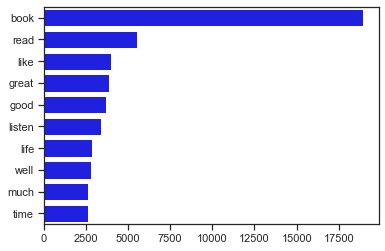

In [27]:
#Plot common wordf2
#Obtain top 10 wordf2
top_10 = fdist.most_common(10)
#Create pandas series to make plotting easier
fd = pd.Series(dict(top_10))
sns.set_theme(style="ticks")
sns.barplot(y=fd.index, x=fd.values, color='blue');

In [28]:
#Drop wordf2 which occur less than a certain amount of times
# df2['Reviews'] = df2['Reviews'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
# df2['Reviews']

In [29]:
#Lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [30]:
#Apply lemmatization
wordnet_lem = WordNetLemmatizer()
df2['Reviews_preprocessing'] = df2['Reviews_preprocessing'].apply(wordnet_lem.lemmatize)

In [31]:
#View results
df2['Reviews_preprocessing']

0                                   many tips deliver good
1                                           book leapt top
2                                                   better
3                                        thought provoking
4                              voice gave massive headache
                               ...                        
18573    genius richard attenborough beyond belief inte...
18574    good thing disappointed book ended written spe...
18575    intrigued laughing whole way always fan man pr...
18576    spellbinding loved book interesting see evolut...
18577    absolutely uplifting thoroughly enjoyable adve...
Name: Reviews_preprocessing, Length: 18578, dtype: object

In [32]:
#Sentiment Analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [33]:
#Word Cloud
all_wordf2_lem = ' '.join([word for word in df2['Reviews_preprocessing']])

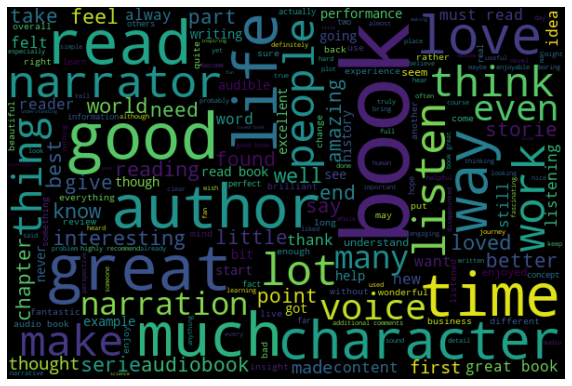

In [34]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_wordf2_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

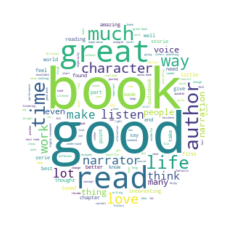

In [35]:
#Different style of word cloud to use
x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_wordf2_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

<AxesSubplot:>

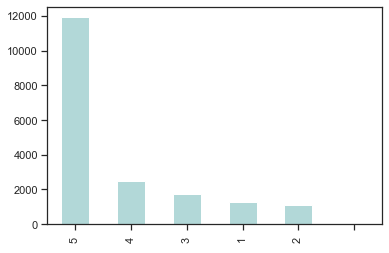

In [36]:
df2['Rating'].value_counts().plot.bar(color='#b2d8d8')

# Modeling

#### Textblob (Rule-based methods):

    

In [37]:
def textblob_score(sentence):
    return TextBlob(sentence).polarity

In [38]:
dfm1=df2.copy()

In [126]:
print(dfm1.dtypes)

Title                    object
Reviews                  object
Rating                   object
Reviews_preprocessing    object
dtype: object


In [146]:
# Convert textblob sentiment score
dfm1['textblob_score'] = dfm1['Reviews_preprocessing'].apply(textblob_score)
dfm1

,Title,Reviews,Rating,Reviews_preprocessing,Sentiment,Rating_pred_textblob,textblob_score
0,Storyworthy,not many tips on how to deliver a good story,2,many tips deliver good,Positive,4,0.600000
1,Storyworthy,This book leapt into my top 5,5,book leapt top,Positive,4,0.500000
2,Storyworthy,There are better books On Story then this,1,better,Positive,4,0.500000
3,Storyworthy,Thought provoking,5,thought provoking,Neutral,3,0.000000
4,Storyworthy,his voice gave me a massive headache,1,voice gave massive headache,Neutral,3,0.000000
...,...,...,...,...,...,...,...
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,genius richard attenborough beyond belief inte...,Positive,4,0.483333
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,good thing disappointed book ended written spe...,Positive,4,0.270000
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,intrigued laughing whole way always fan man pr...,Positive,4,0.377273
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,spellbinding loved book interesting see evolut...,Positive,4,0.600000


In [147]:
dfm1['Sentiment'] = dfm1['textblob_score'].apply(lambda x: 'Positive' if x >0 else 'Neutral' if x==0 else 'Negative')

In [148]:
# Convert float score to category based on binning
dfm1['Rating_pred_textblob'] = pd.cut(dfm1['textblob_score'], bins=5, labels=[1, 2, 3, 4, 5])
dfm1 = dfm1.drop('textblob_score', axis=1)
dfm1

,Title,Reviews,Rating,Reviews_preprocessing,Sentiment,Rating_pred_textblob
0,Storyworthy,not many tips on how to deliver a good story,2,many tips deliver good,Positive,4
1,Storyworthy,This book leapt into my top 5,5,book leapt top,Positive,4
2,Storyworthy,There are better books On Story then this,1,better,Positive,4
3,Storyworthy,Thought provoking,5,thought provoking,Neutral,3
4,Storyworthy,his voice gave me a massive headache,1,voice gave massive headache,Neutral,3
...,...,...,...,...,...,...
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,genius richard attenborough beyond belief inte...,Positive,4
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,good thing disappointed book ended written spe...,Positive,4
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,intrigued laughing whole way always fan man pr...,Positive,4
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,spellbinding loved book interesting see evolut...,Positive,4


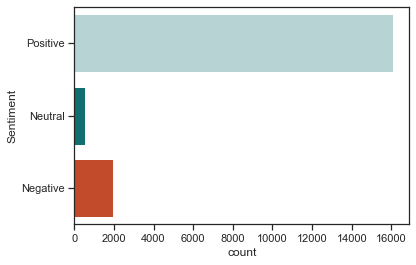

In [68]:
#Visualize data
#Number of reviews based on sentiment
sns.countplot(y='Sentiment', 
             data=dfm1, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

<AxesSubplot:>

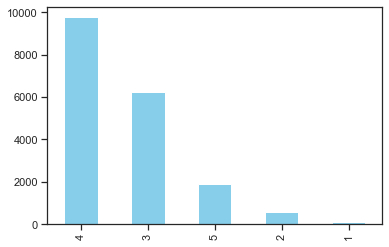

In [69]:
dfm1['Rating_pred_textblob'].value_counts().plot.bar(color='skyblue')

#### Vader (Rule-based methods):

In [185]:
dfm2=df2.copy()

In [186]:
vader = SentimentIntensityAnalyzer()

In [187]:
dfm2['Polarity']=dfm2['Reviews_preprocessing'].apply(lambda x: vader.polarity_scores(x))
# df_m4['Sentiment'] = df_m4['vader_score'].apply(lambda x: 'Positive' if x >0 else 'Neutral' if x==0 else 'Negative')
dfm2.head()

,Title,Reviews,Rating,Reviews_preprocessing,Polarity
0,Storyworthy,not many tips on how to deliver a good story,2,many tips deliver good,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
1,Storyworthy,This book leapt into my top 5,5,book leapt top,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp..."
2,Storyworthy,There are better books On Story then this,1,better,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,Storyworthy,Thought provoking,5,thought provoking,"{'neg': 0.643, 'neu': 0.357, 'pos': 0.0, 'comp..."
4,Storyworthy,his voice gave me a massive headache,1,voice gave massive headache,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [188]:
dfm2 = pd.concat(
    [dfm2.drop(['Polarity'], axis=1), 
     dfm2['Polarity'].apply(pd.Series)], axis=1)
dfm2.tail()

,Title,Reviews,Rating,Reviews_preprocessing,neg,neu,pos,compound
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,genius richard attenborough beyond belief inte...,0.000,0.450,0.550,0.9543
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,good thing disappointed book ended written spe...,0.093,0.450,0.456,0.9022
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,intrigued laughing whole way always fan man pr...,0.036,0.496,0.468,0.9824
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,spellbinding loved book interesting see evolut...,0.000,0.476,0.524,0.7650
18577,David Attenborough: The Early Years Collection,Absolutely uplifting and thoroughly enjoyable...,5,absolutely uplifting thoroughly enjoyable adve...,0.150,0.502,0.347,0.9147


In [191]:
# Convert float score to category based on binning
dfm2['Rating_pred_vader'] = pd.cut(dfm2['compound'], bins=5, labels=[1, 2, 3, 4, 5])
# df_m4 = df_m4.drop('compound', axis=1)
dfm2['Sentiment'] = dfm2['compound'].apply(lambda x: 'Positive' if x>0 else 'Neutral' if x==0 else 'Negative')
dfm2.tail()

,Title,Reviews,Rating,Reviews_preprocessing,neg,neu,pos,compound,Rating_pred_vader,Sentiment
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,genius richard attenborough beyond belief inte...,0.000,0.450,0.550,0.9543,5,Positive
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,good thing disappointed book ended written spe...,0.093,0.450,0.456,0.9022,5,Positive
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,intrigued laughing whole way always fan man pr...,0.036,0.496,0.468,0.9824,5,Positive
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,spellbinding loved book interesting see evolut...,0.000,0.476,0.524,0.7650,5,Positive
18577,David Attenborough: The Early Years Collection,Absolutely uplifting and thoroughly enjoyable...,5,absolutely uplifting thoroughly enjoyable adve...,0.150,0.502,0.347,0.9147,5,Positive


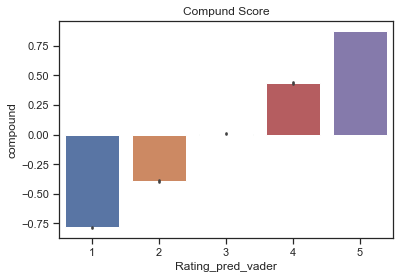

In [176]:
ax = sns.barplot(data=dfm2, x='Rating_pred_vader', y='compound')
ax.set_title('Compund Score')
plt.show()

In [193]:
dfm2.iloc[2:,:]

,Title,Reviews,Rating,Reviews_preprocessing,neg,neu,pos,compound,Rating_pred_vader,Sentiment
2,Storyworthy,There are better books On Story then this,1,better,0.000,0.000,1.000,0.4404,4,Positive
3,Storyworthy,Thought provoking,5,thought provoking,0.643,0.357,0.000,-0.2023,2,Negative
4,Storyworthy,his voice gave me a massive headache,1,voice gave massive headache,0.000,1.000,0.000,0.0000,3,Neutral
5,Storyworthy,Really don t waste your hard earned money on ...,1,waste hard earned money,0.677,0.323,0.000,-0.4939,2,Negative
6,Storyworthy,Okay that was good gotcha,4,okay good gotcha,0.000,0.172,0.828,0.5859,4,Positive
...,...,...,...,...,...,...,...,...,...,...
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,genius richard attenborough beyond belief inte...,0.000,0.450,0.550,0.9543,5,Positive
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,good thing disappointed book ended written spe...,0.093,0.450,0.456,0.9022,5,Positive
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,intrigued laughing whole way always fan man pr...,0.036,0.496,0.468,0.9824,5,Positive
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,spellbinding loved book interesting see evolut...,0.000,0.476,0.524,0.7650,5,Positive


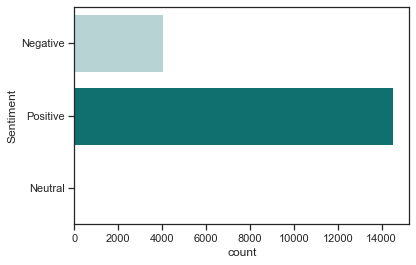

In [177]:
#Visualize data
#Number of reviews based on sentiment
sns.countplot(y='Sentiment', 
             data=dfm2, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );


<AxesSubplot:>

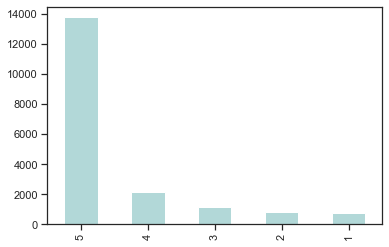

In [178]:
dfm2['Rating_pred_vader'].value_counts().plot.bar(color='#b2d8d8')

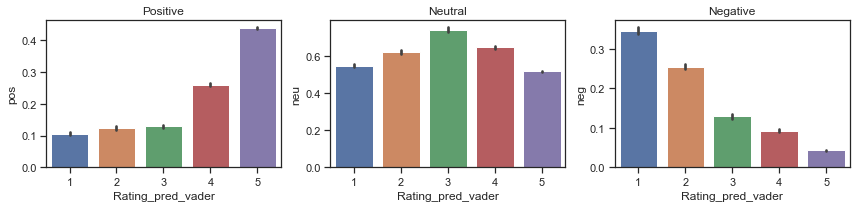

In [179]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=dfm2, x='Rating_pred_vader', y='pos', ax=axs[0])
sns.barplot(data=dfm2, x='Rating_pred_vader', y='neu', ax=axs[1])
sns.barplot(data=dfm2, x='Rating_pred_vader', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Feature-based methods:

### TFIDF and Linear SVC

In [108]:
dfm3=df2.copy()

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [110]:
tfidf = TfidfVectorizer()
X= tfidf.fit_transform(dfm3['Reviews_preprocessing'])
y= dfm3['Rating']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
print(X_train.shape)
print(X_test.shape)

(14862, 29908)
(3716, 29908)


In [113]:
clf= LinearSVC()

In [114]:
# clf=LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [115]:
y_pred =clf.predict(X_test)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          1        0.54      0.42      0.47       260
          2        0.31      0.19      0.23       221
          3        0.37      0.26      0.31       358
          4        0.30      0.20      0.24       481
          5        0.80      0.94      0.87      2395

    accuracy                           0.70      3716
   macro avg       0.39      0.33      0.35      3716
weighted avg       0.65      0.70      0.67      3716



D:\Users\zayneb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\zayneb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\zayneb\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
def print_accuracy(y_test,y_predNB):
    "Print f1 score and accuracy after making predictions"
    f1_macro = f1_score(y_test, y_predNB, average='macro')
    acc = accuracy_score(y_test, y_predNB)
    return f1_macro, acc

In [153]:
# Get model accuracy and f1 score
acc = print_accuracy(y_test,y_pred)
print("Macro F1-score: {}\nAccuracy: {}".format(acc[0], acc[1]))

Macro F1-score: 0.5329166425727069
Accuracy: 0.6988697524219591


### multinomial naive bayes classifier 

In [81]:
dfNB=df2.copy()

In [82]:
from sklearn.naive_bayes import MultinomialNB

In [83]:
tfidf = TfidfVectorizer()
X= tfidf.fit_transform(dfNB['Reviews_preprocessing'])
y= dfNB['Rating']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
%%time
# Create and train a multinomial naive bayes classifier (MultinomialNB)
Bayes = MultinomialNB()
Bayes.fit(X_train,y_train)

CPU times: total: 62.5 ms
Wall time: 71.8 ms


MultinomialNB()

In [86]:
y_predNB=Bayes.predict(X_test)

print(classification_report(y_test, y_predNB))

In [155]:
# Get model accuracy and f1 score
acc = print_accuracy(y_test,y_predNB)
print("Macro F1-score: {}\nAccuracy: {}".format(acc[0], acc[1]))

Macro F1-score: 53.4127350147396
Accuracy: 0.6134337997847147


### Bert (prerained model)

In [158]:
#Instantiate Model
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [159]:
def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [160]:
dfm4=df2.copy()

In [164]:
dfm4=dfm4.drop('Reviews_preprocessing', axis=1)
dfm4


,Title,Reviews,Rating
0,Storyworthy,not many tips on how to deliver a good story,2
1,Storyworthy,This book leapt into my top 5,5
2,Storyworthy,There are better books On Story then this,1
3,Storyworthy,Thought provoking,5
4,Storyworthy,his voice gave me a massive headache,1
...,...,...,...
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5


In [165]:
dfm4['Rating_pred_Bert'] = dfm4['Reviews'].apply(lambda x: sentiment_score(x[0:512]))
dfm4

,Title,Reviews,Rating,Rating_pred_Bert
0,Storyworthy,not many tips on how to deliver a good story,2,3
1,Storyworthy,This book leapt into my top 5,5,5
2,Storyworthy,There are better books On Story then this,1,3
3,Storyworthy,Thought provoking,5,2
4,Storyworthy,his voice gave me a massive headache,1,1
...,...,...,...,...
18573,David Attenborough: The Early Years Collection,Genius Richard Attenborough is beyond belief ...,5,5
18574,David Attenborough: The Early Years Collection,Too good There is only one thing which disapp...,5,2
18575,David Attenborough: The Early Years Collection,Had me intrigued and laughing the whole way I...,5,4
18576,David Attenborough: The Early Years Collection,Spellbinding Loved this book So interesting t...,5,5


In [166]:
dfm4['Sentiment'] = dfm4['Rating_pred_Bert'].apply(lambda x: 'Positive' if x >3 else 'Neutral' if x==3 else 'Negative')


In [169]:
columnsTitles=['Title','Reviews','Rating_pred_Bert','Sentiment','Rating']
dfm4=dfm4.reindex(columns=columnsTitles)
dfm4.head()

,Title,Reviews,Rating_pred_Bert,Sentiment,Rating
0,Storyworthy,not many tips on how to deliver a good story,3,Neutral,2
1,Storyworthy,This book leapt into my top 5,5,Positive,5
2,Storyworthy,There are better books On Story then this,3,Neutral,1
3,Storyworthy,Thought provoking,2,Negative,5
4,Storyworthy,his voice gave me a massive headache,1,Negative,1


In [104]:
df_sentiment= dfm4.copy()

In [105]:
df_sentiment=df_sentiment.drop('Reviews_preprocessing', axis=1)


In [106]:
df_sentiment=df_sentiment.drop('Rating', axis=1)
df_sentiment.head()

,Title,Reviews,Rating_pred_Bert,Sentiment
0,Storyworthy,not many tips on how to deliver a good story,3,Neutral
1,Storyworthy,This book leapt into my top 5,5,Positive
2,Storyworthy,There are better books On Story then this,3,Neutral
3,Storyworthy,Thought provoking,2,Negative
4,Storyworthy,his voice gave me a massive headache,1,Negative


In [107]:
df_sentiment.to_csv("reviews_sentiments.csv")

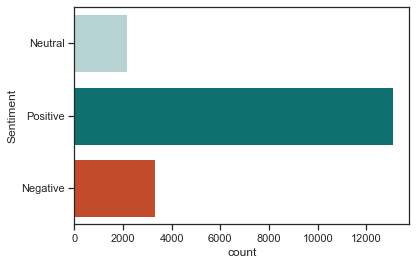

In [108]:
#Visualize data
#Number of reviews based on sentiment
sns.countplot(y='Sentiment', 
             data=dfm4, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

<AxesSubplot:>

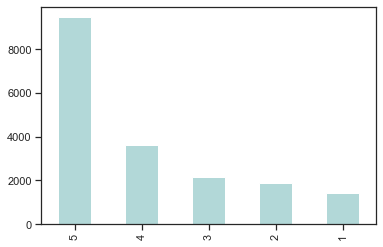

In [109]:
dfm4['Rating_pred_Bert'].value_counts().plot.bar(color='#b2d8d8')

In [110]:
#Encode and Calculate Sentiment
tokens = tokenizer.encode('There are better books On Story then this', return_tensors='pt')

In [111]:
result = model(tokens)

In [112]:
result.logits

tensor([[ 0.0513,  1.1678,  1.2772, -0.5514, -1.6940]],
       grad_fn=<AddmmBackward0>)

In [113]:
int(torch.argmax(result.logits))+1

3

In [114]:
dfresult=round(dfm4.groupby(['Title']).mean(),1)
dfresult.rename(columns = {'Rating_pred_Bert':'Book_Rating_Pred_Bert'}, inplace = True)
dfresult = dfresult.rename_axis('Title').reset_index()
dfresult

,Title,Book_Rating_Pred_Bert
0,101 Essays That Will Change the Way You Think,3.4
1,15 Secrets Successful People Know About Time M...,4.4
2,1962: The War That Wasn't,4.2
3,1984,4.1
4,1991,4.2
...,...,...
779,YouTube Secrets,3.8
780,Youngblood,3.3
781,Your Money or Your Life,3.2
782,Your Soul's Plan,4.4


In [116]:
dfresult.duplicated().value_counts()

False    784
dtype: int64

In [117]:
df_final=df.merge(dfresult,on='Title')
df_final.head()

,Title,Author,Image_URL,Book_URL,Type,Description,Reviews,Rating,Book_Rating_Pred_Bert
0,Storyworthy,Matthew Dicks,https://m.media-amazon.com/images/I/51foPoGk58...,https://www.audible.in/pd/Storyworthy-Audioboo...,['Business & Careers'],A five-time Moth GrandSLAM winner and bestsell...,[' not many tips on how to deliver a good stor...,"['2', '5', '1', '5', '1', '1', '4', '5', '4', ...",2.9
1,The New Comedy Bible,Judy Carter,https://m.media-amazon.com/images/I/51UIsSCRlQ...,https://www.audible.in/pd/The-New-Comedy-Bible...,['Arts & Entertainment'],"The New Comedy Bible is a step-by-step, no exc...","[' PDF workbook ', ' Fantastic Book ', ' Horri...","['5', '5', '1', '5', '3', '5', '5', '5', '4', ...",4.0
2,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...","[' Better live ', ' couldn t get through it ',...","['1', '2', '3', '4', '1', '1', '2', '2', '1', ...",3.2
3,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...",[' I just love it I love Ellen good for your e...,"['5', '5', '5', '5', '4', '5', '4', '4', '4', ...",3.2
4,Someday Is Today,Matthew Dicks,https://m.media-amazon.com/images/I/41l1gHqfvp...,https://www.audible.in/pd/Someday-Is-Today-Aud...,['Arts & Entertainment'],REALIZE YOUR CREATIVE DREAMS—STARTING TODAY Ar...,"[' Super motivating ', ' Inspiring ']","['5', '5']",5.0


In [127]:
df_test=df_final.copy()
df_test["Title"].drop_duplicates()

0                                         Storyworthy
1                                The New Comedy Bible
2                             Seriously...I'm Kidding
4                                    Someday Is Today
5                                          Good Omens
                            ...                      
793                Socialist Dreams and Beauty Queens
794                                      World Travel
795                                 Canada Is Awesome
796                            To a Mountain in Tibet
797    David Attenborough: The Early Years Collection
Name: Title, Length: 784, dtype: object

In [128]:
df_test.head()

,Title,Author,Image_URL,Book_URL,Type,Description,Reviews,Rating,Book_Rating_Pred_Bert
0,Storyworthy,Matthew Dicks,https://m.media-amazon.com/images/I/51foPoGk58...,https://www.audible.in/pd/Storyworthy-Audioboo...,['Business & Careers'],A five-time Moth GrandSLAM winner and bestsell...,[' not many tips on how to deliver a good stor...,"['2', '5', '1', '5', '1', '1', '4', '5', '4', ...",2.9
1,The New Comedy Bible,Judy Carter,https://m.media-amazon.com/images/I/51UIsSCRlQ...,https://www.audible.in/pd/The-New-Comedy-Bible...,['Arts & Entertainment'],"The New Comedy Bible is a step-by-step, no exc...","[' PDF workbook ', ' Fantastic Book ', ' Horri...","['5', '5', '1', '5', '3', '5', '5', '5', '4', ...",4.0
2,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...","[' Better live ', ' couldn t get through it ',...","['1', '2', '3', '4', '1', '1', '2', '2', '1', ...",3.2
3,Seriously...I'm Kidding,Ellen DeGeneres,https://m.media-amazon.com/images/I/51ubd-qU8J...,https://www.audible.in/pd/SeriouslyIm-Kidding-...,['Biographies & Memoirs'],"With the winning, upbeat candor that has made ...",[' I just love it I love Ellen good for your e...,"['5', '5', '5', '5', '4', '5', '4', '4', '4', ...",3.2
4,Someday Is Today,Matthew Dicks,https://m.media-amazon.com/images/I/41l1gHqfvp...,https://www.audible.in/pd/Someday-Is-Today-Aud...,['Arts & Entertainment'],REALIZE YOUR CREATIVE DREAMS—STARTING TODAY Ar...,"[' Super motivating ', ' Inspiring ']","['5', '5']",5.0


In [130]:
df_test.to_csv('English_DB.csv')

In [207]:
dfm5=df2.copy()


In [208]:
!pip install nrclex

In [209]:
from nrclex import NRCLex

In [210]:

emotion = []
for i in range(len(dfm5)):
    emotions = NRCLex(dfm5['Reviews'][i])
    emotion.append(emotions.top_emotions[0][0])
dfm5['emotion'] = emotion

In [211]:
dfm5['emotion'].value_counts()

positive        11235
trust            3483
fear             1407
negative         1263
anticipation      643
anger             334
surprise          171
sadness            31
joy                 6
disgust             5
Name: emotion, dtype: int64

In [212]:
dfm5

,Title,Reviews,Rating,emotion
0,Storyworthy,many tips deliver good,2,trust
1,Storyworthy,book leapt top,5,trust
2,Storyworthy,better,1,fear
3,Storyworthy,thought provoking,5,anger
4,Storyworthy,voice gave massive headache,1,negative
...,...,...,...,...
18573,David Attenborough: The Early Years Collection,genius richard attenborough beyond belief inte...,5,positive
18574,David Attenborough: The Early Years Collection,good thing disappointed book ended written spe...,5,positive
18575,David Attenborough: The Early Years Collection,intrigued laughing whole way always fan man pr...,5,trust
18576,David Attenborough: The Early Years Collection,spellbinding loved book interesting see evolut...,5,positive


In [214]:
dfm5.to_csv('sentiment.csv')

In [215]:
df.loc[df["Title"] == "Storyworthy" , "Reviews"].tolist()

["[' not many tips on how to deliver a good story ', ' This book leapt into my top 5 ', ' There are better books On Story then this ', ' Thought provoking ', ' his voice gave me a massive headache ', ' Really don t waste your hard earned money on this ', ' Okay that was good gotcha ', ' Matthew Dicks is a superhero ', ' Quite insightful but doesn t get into the why ', ' Headline required ']"]